# **Experiment Notebook 5**

## Context

### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 4.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.4 requires scikit-learn>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import altair as alt
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1.   Load Dataset

In [3]:
file_url = 'https://drive.usercontent.google.com/download?id=1I9YA9aI-Cnc_IsGjyKfD_PldX5nVMmR6&export=download&authuser=0'

In [4]:
df = pd.read_csv(file_url)
df

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


### 2. Explore Dataset

In [5]:
df.shape

(131337, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [7]:
df.duplicated().values.any()

False

In [8]:
df.nunique()

ID                           131337
Target                            2
age_band                          7
gender                            2
car_model                        19
car_segment                       4
age_of_vehicle_years             10
sched_serv_warr                  10
non_sched_serv_warr              10
sched_serv_paid                  10
non_sched_serv_paid              10
total_paid_services              10
total_services                   10
mth_since_last_serv              10
annualised_mileage               10
num_dealers_visited              10
num_serv_dealer_purchased        10
dtype: int64

### 3. Explore Target variable

In [9]:
target =  df['Target']

In [10]:
df_features = df.drop(['Target'], axis = 1)
df_features

,ID,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


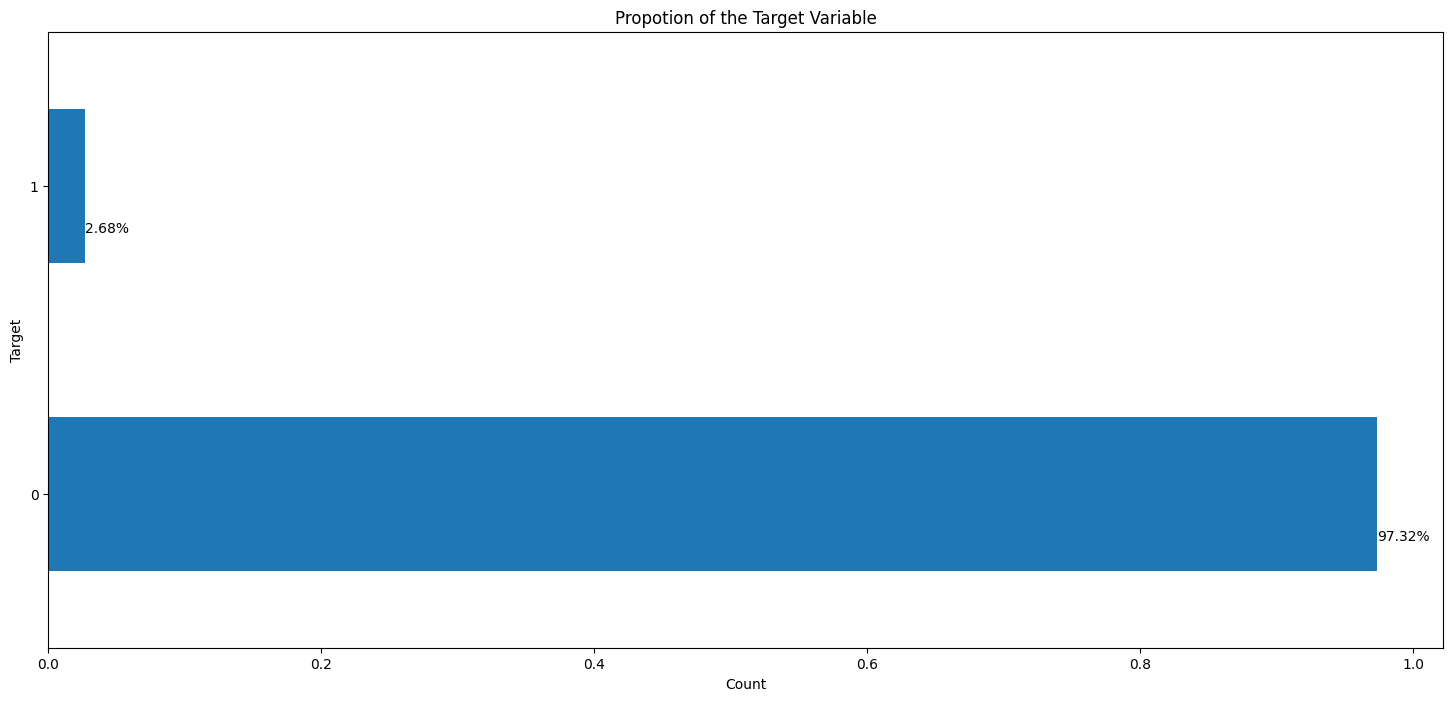

Target
0    97.31911
1     2.68089
Name: proportion, dtype: float64


Target
0    127816
1      3521
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,8))
ax = df["Target"].value_counts(normalize=True).plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Target")
plt.title("Propotion of the Target Variable")

for p in ax.patches:
    percentage = '{:.2f}%'.format(p.get_width() * 100)
    ax.annotate(percentage, (p.get_x() + p.get_width(), p.get_y() + 0.1))

plt.show()

class_percentages = df["Target"].value_counts(normalize=True) * 100
print(class_percentages)

df["Target"].value_counts()

### 4. Data Exploration and Preparation

In [12]:
df['gender'].replace({'Female':0, 'Male':1}, inplace = True)

In [13]:
male_prob = df['gender'].value_counts(normalize=True)[1]
male_prob

0.5815344435667188

In [14]:
df['gender'] = df['gender'].apply(lambda x: np.random.choice([1, 0], p=[male_prob, 1-male_prob]) if pd.isnull(x) else x)

In [15]:
df = df.drop(['age_band'], axis = 1)

In [16]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols

['car_model', 'car_segment']

In [17]:
df = pd.get_dummies(data = df, columns = ['car_segment'], dtype = int)
df.head()

,ID,Target,gender,car_model,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,1,0,1.0,model_1,9,2,10,3,7,5,6,9,8,10,4,1,0,0,0
1,2,0,0.0,model_2,6,10,3,10,4,9,10,6,10,7,10,0,0,0,1
2,3,0,1.0,model_3,9,10,9,10,9,10,10,7,10,6,10,0,1,0,0
3,5,0,1.0,model_3,5,8,5,8,4,5,6,4,10,9,7,0,1,0,0
4,6,0,0.0,model_2,8,9,4,10,7,9,8,5,4,4,9,0,0,0,1


In [18]:
frequency_encoding = df['car_model'].value_counts(normalize = True)
frequency_encoding

car_model
model_2     0.262614
model_5     0.187868
model_3     0.130001
model_1     0.116730
model_4     0.115390
model_7     0.062184
model_8     0.049057
model_10    0.024479
model_6     0.023383
model_9     0.007568
model_13    0.005436
model_12    0.004675
model_11    0.004660
model_15    0.002543
model_17    0.001165
model_16    0.000868
model_18    0.000769
model_14    0.000594
model_19    0.000015
Name: proportion, dtype: float64

In [19]:
df['car_model_freq'] = df['car_model'].map(frequency_encoding)
df[['car_model', 'car_model_freq']].head()

,car_model,car_model_freq
0,model_1,0.116730
1,model_2,0.262614
2,model_3,0.130001
3,model_3,0.130001
4,model_2,0.262614


In [20]:
num_cols = df.select_dtypes('number').columns.to_list()
num_cols

['ID',
 'Target',
 'gender',
 'age_of_vehicle_years',
 'sched_serv_warr',
 'non_sched_serv_warr',
 'sched_serv_paid',
 'non_sched_serv_paid',
 'total_paid_services',
 'total_services',
 'mth_since_last_serv',
 'annualised_mileage',
 'num_dealers_visited',
 'num_serv_dealer_purchased',
 'car_segment_LCV',
 'car_segment_Large/SUV',
 'car_segment_Other',
 'car_segment_Small/Medium',
 'car_model_freq']

In [21]:
df_cor_matrix = df[num_cols].corr()
df_cor_matrix

,ID,Target,gender,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium,car_model_freq
ID,1.000000,0.279716,0.006453,-0.034468,-0.051190,-0.023993,-0.051035,-0.012360,-0.027313,-0.046717,-0.039836,-0.022544,-0.013416,-0.016724,-0.000118,0.004839,-0.002728,-0.004594,-0.004306
Target,0.279716,1.000000,0.015435,-0.124091,-0.177424,-0.081328,-0.179040,-0.028396,-0.084429,-0.159905,-0.141695,-0.073055,-0.047244,-0.052618,0.010310,0.014811,-0.001245,-0.022815,-0.011897
gender,0.006453,0.015435,1.000000,-0.005877,0.001345,-0.001105,0.005061,0.018205,0.020194,0.003102,-0.018843,0.007065,-0.001534,-0.009640,0.125405,0.047067,-0.004195,-0.145847,-0.081418
age_of_vehicle_years,-0.034468,-0.124091,-0.005877,1.000000,0.431484,0.427567,0.533914,0.330540,0.472669,0.505577,0.622472,0.432593,0.367122,0.318558,-0.055091,-0.053779,-0.018175,0.097789,0.061210
sched_serv_warr,-0.051190,-0.177424,0.001345,0.431484,1.000000,0.452472,0.862843,0.385451,0.647962,0.824917,0.274362,0.745811,0.400348,0.595877,-0.031230,0.001040,-0.025914,0.024801,0.082789
non_sched_serv_warr,-0.023993,-0.081328,-0.001105,0.427567,0.452472,1.000000,0.461550,0.778126,0.711511,0.806163,0.328036,0.585439,0.460416,0.556104,0.007975,0.023439,-0.022775,-0.028614,0.056011
sched_serv_paid,-0.051035,-0.179040,0.005061,0.533914,0.862843,0.461550,1.000000,0.421448,0.734002,0.768570,0.340992,0.713790,0.421232,0.552438,-0.020923,0.005326,-0.025641,0.012372,0.080327
non_sched_serv_paid,-0.012360,-0.028396,0.018205,0.330540,0.385451,0.778126,0.421448,1.000000,0.858045,0.653475,0.291647,0.505798,0.418157,0.480041,0.107797,0.023235,-0.021254,-0.107517,0.017222
total_paid_services,-0.027313,-0.084429,0.020194,0.472669,0.647962,0.711511,0.734002,0.858045,1.000000,0.791230,0.337380,0.675939,0.470388,0.567864,0.101615,0.018134,-0.027546,-0.097289,0.034553
total_services,-0.046717,-0.159905,0.003102,0.505577,0.824917,0.806163,0.768570,0.653475,0.791230,1.000000,0.310909,0.783641,0.480503,0.668303,-0.013047,0.018664,-0.028275,-0.006994,0.082389


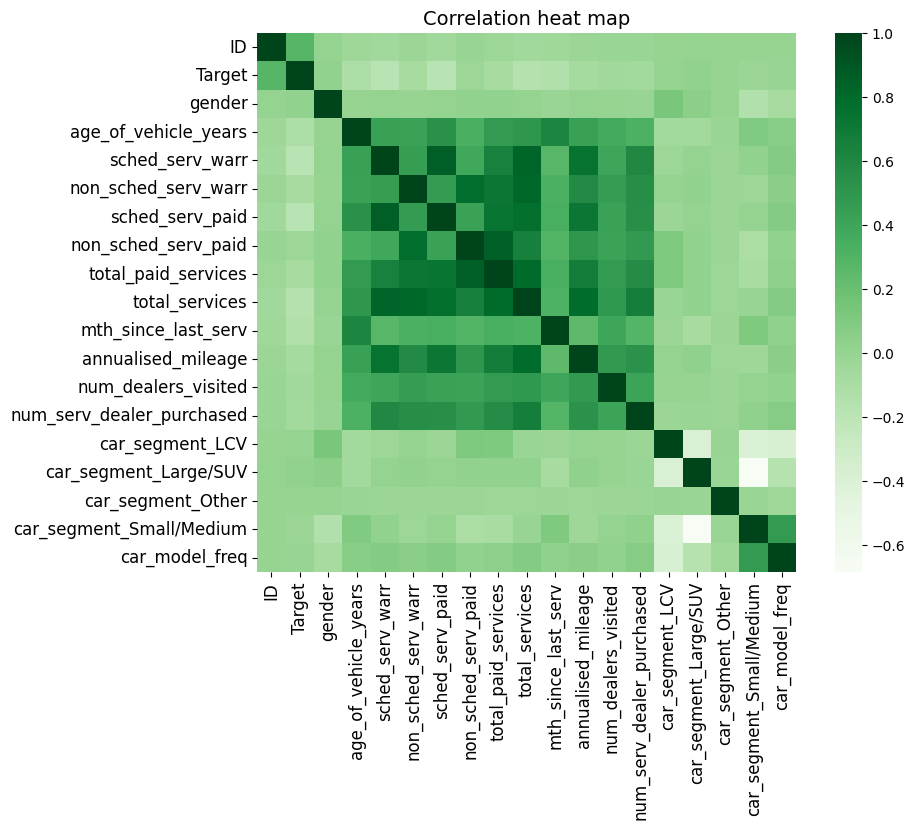

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
_ = sns.heatmap(df_cor_matrix, square=True, cmap='Greens')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

<Axes: >

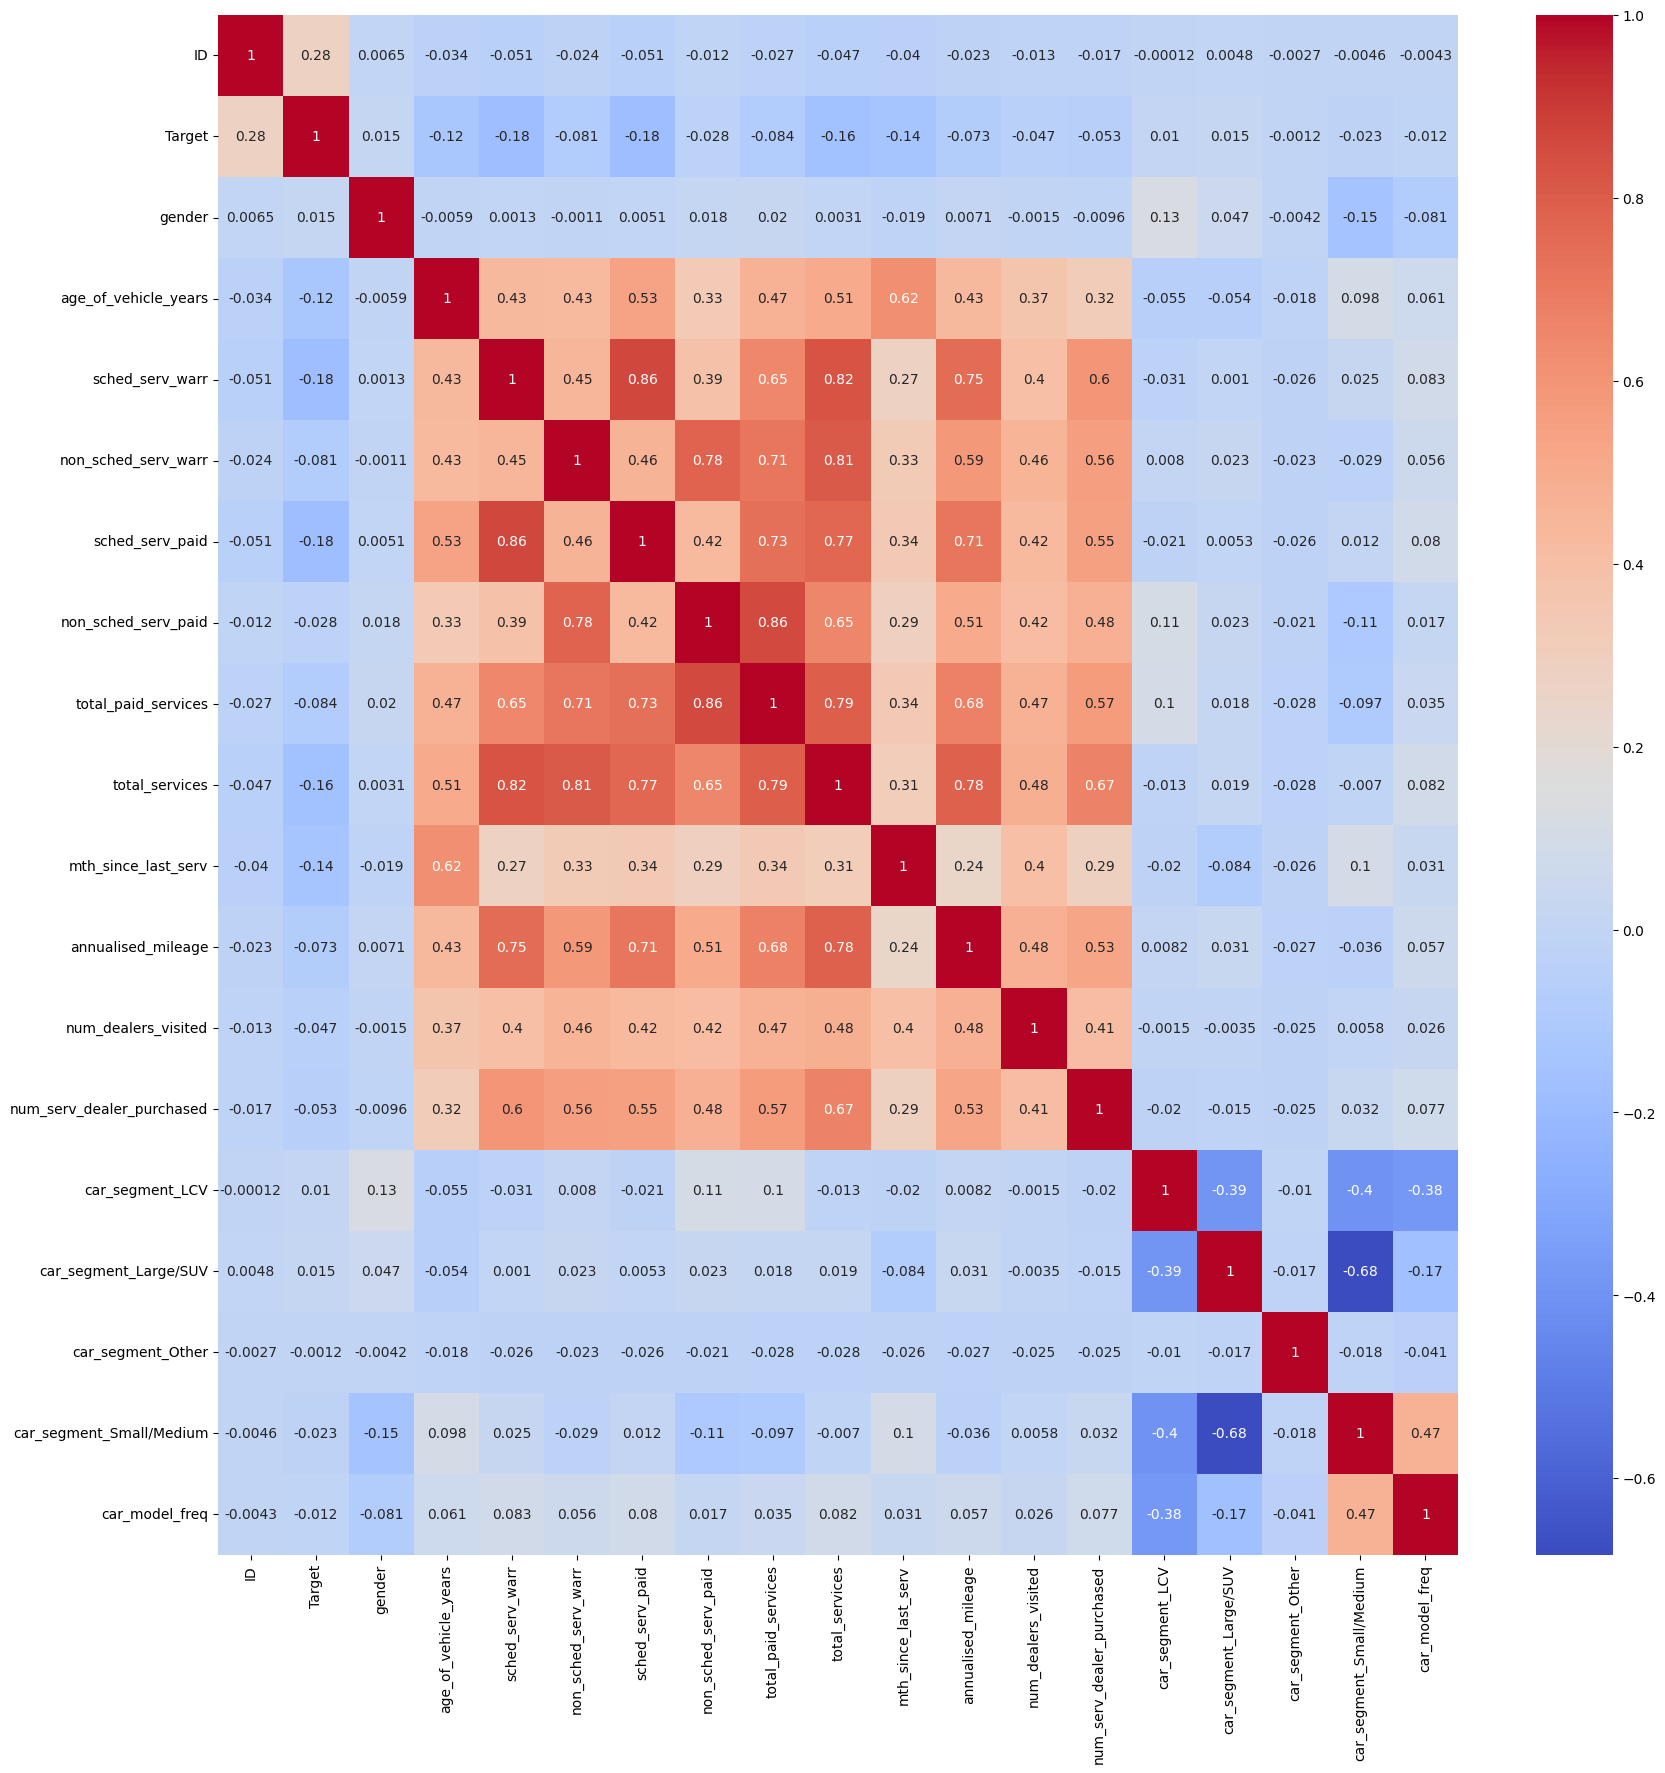

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cor_matrix, cmap = "coolwarm", annot=True)

In [24]:
cor_with_label = df_cor_matrix['Target']
cor_sorted = cor_with_label.sort_values(ascending=False)
cor_sorted

Target                       1.000000
ID                           0.279716
gender                       0.015435
car_segment_Large/SUV        0.014811
car_segment_LCV              0.010310
car_segment_Other           -0.001245
car_model_freq              -0.011897
car_segment_Small/Medium    -0.022815
non_sched_serv_paid         -0.028396
num_dealers_visited         -0.047244
num_serv_dealer_purchased   -0.052618
annualised_mileage          -0.073055
non_sched_serv_warr         -0.081328
total_paid_services         -0.084429
age_of_vehicle_years        -0.124091
mth_since_last_serv         -0.141695
total_services              -0.159905
sched_serv_warr             -0.177424
sched_serv_paid             -0.179040
Name: Target, dtype: float64

In [25]:
df.columns

Index(['ID', 'Target', 'gender', 'car_model', 'age_of_vehicle_years',
       'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid',
       'non_sched_serv_paid', 'total_paid_services', 'total_services',
       'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_segment_LCV', 'car_segment_Large/SUV',
       'car_segment_Other', 'car_segment_Small/Medium', 'car_model_freq'],
      dtype='object')

In [26]:
choosen_features = ['gender', 'age_of_vehicle_years',
       'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid',
       'non_sched_serv_paid', 'total_paid_services', 'total_services',
       'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_segment_LCV', 'car_segment_Large/SUV',
       'car_segment_Other', 'car_segment_Small/Medium', 'car_model_freq']

### 5. Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [28]:
df[choosen_features] = standard_scaler.fit_transform(df[choosen_features])
df[choosen_features].head()

,gender,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium,car_model_freq
0,0.848843,1.233424,-1.196990,1.577161,-0.849566,0.522096,-0.167231,0.189514,1.234443,0.874698,1.569321,-0.516398,2.082691,-0.811135,-0.021019,-0.842896,-0.493523
1,-1.178074,0.178307,1.576630,-0.861308,1.575502,-0.520046,1.221466,1.580359,0.185399,1.575252,0.526482,1.576007,-0.480148,-0.811135,-0.021019,1.186386,1.355834
2,0.848843,1.233424,1.576630,1.228808,1.575502,1.216857,1.568640,1.580359,0.535080,1.575252,0.178868,1.576007,-0.480148,1.232841,-0.021019,-0.842896,-0.325285
3,0.848843,-0.173398,0.883225,-0.164603,0.882625,-0.520046,-0.167231,0.189514,-0.513964,1.575252,1.221708,0.529805,-0.480148,1.232841,-0.021019,-0.842896,-0.325285
4,-1.178074,0.881718,1.229927,-0.512955,1.575502,0.522096,1.221466,0.884936,-0.164283,-0.526409,-0.516358,1.227273,-0.480148,-0.811135,-0.021019,1.186386,1.355834


In [29]:
X = df[choosen_features]
y = target

### 6. Split Dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [31]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(91935, 17) (91935,)
(19701, 17) (19701,)
(19701, 17) (19701,)


In [32]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

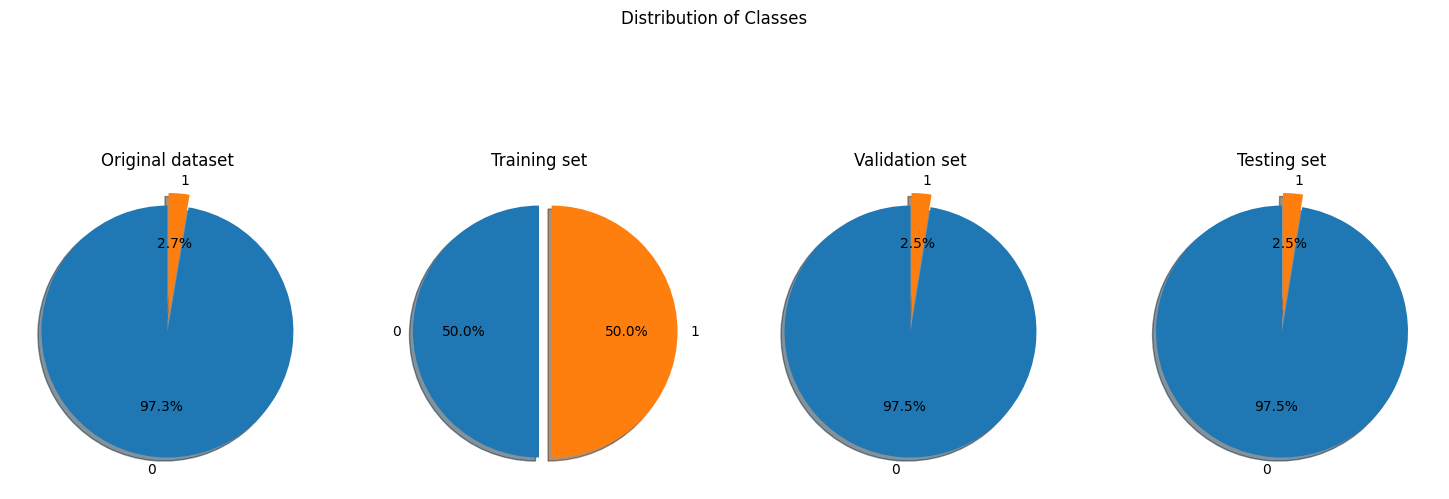

In [35]:
ori_dist = dict(Counter(y))
train_dist = dict(Counter(y_train_smt))
valid_dist = dict(Counter(y_valid))
test_dist = dict(Counter(y_test))

explode = (0, 0.1)

fig, ax = plt.subplots(1, 4, figsize = (15, 15))
fig.suptitle ('Distribution of Classes', y=0.71)
fig.tight_layout(pad = 1)
ax[0].pie(ori_dist.values(), explode = explode, labels = ori_dist.keys(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[0].set_title ('Original dataset')
ax[1].pie(train_dist.values(), explode=explode, labels=train_dist.keys(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[1].set_title ('Training set')
ax[2].pie(test_dist.values(), explode=explode, labels=valid_dist.keys(), autopct='%1.1f%%',shadow=True, startangle=90)
ax[2].set_title ('Validation set')
ax[3].pie(test_dist.values(), explode=explode, labels=test_dist.keys(), autopct='%1.1f%%',shadow=True, startangle=90)
ax[3].set_title ('Testing set')

plt.show()

In [36]:
counter = Counter(y_train)
print('Before',counter)

counter = Counter(y_train_smt)
print('After',counter)

Before Counter({0: 89444, 1: 2491})
After Counter({0: 89444, 1: 89444})


### 7. Extreme Gradient Boosting Model

In [37]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [38]:
from xgboost import XGBClassifier
from sklearn import  model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, fbeta_score, make_scorer

In [39]:
xgb_classifier = XGBClassifier(random_state = 42)

In [40]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [41]:
xgb_y_pred = xgb_classifier.predict(X_valid)

In [42]:
xgb = round(fbeta_score(y_valid, xgb_y_pred, beta = 3)*100, 3)
print(xgb)

81.413


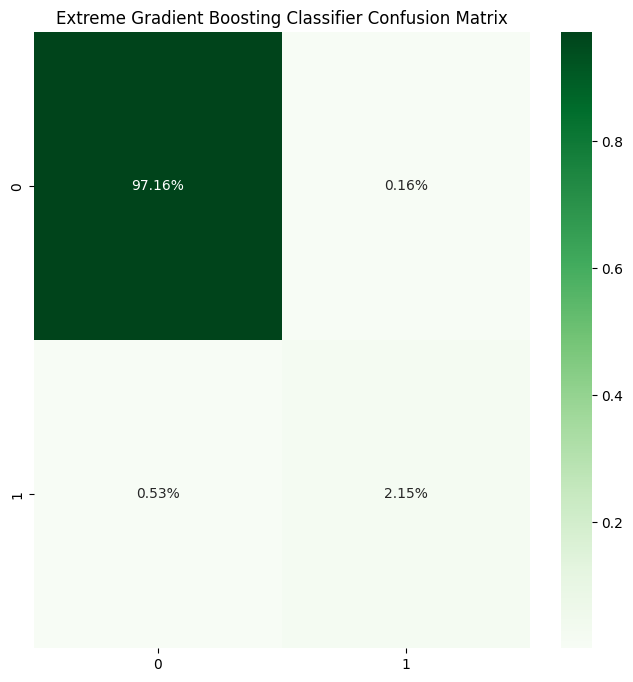

In [43]:
plt.figure(figsize = (8, 8))
cm2 = confusion_matrix(y_valid, xgb_y_pred)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Greens')
plt.title("Extreme Gradient Boosting Classifier Confusion Matrix", fontsize = 12)
plt.show()

In [44]:
print(classification_report(y_valid,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19173
           1       0.93      0.80      0.86       528

    accuracy                           0.99     19701
   macro avg       0.96      0.90      0.93     19701
weighted avg       0.99      0.99      0.99     19701



### **8. Extreme Gradient Boosting Tuning**

In [45]:
f3_scorer = make_scorer(fbeta_score, beta=3)

#### *Step 1: Try to train the XGB model with default hyper parameters and with a number of n_estimators.*

In [46]:
xgb_hyperparameters_grid1 = {
    "n_estimators": [500, 1000, 1500],
    "learning_rate": [0.1],
    "max_depth": [5],
    "min_child_weight": [1],
    "gamma": [0],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "scale_pos_weight": [1],
    "objective": ["binary:logistic"],
    "nthread": [4],
    "sead": [27]
}
    
model_xgb = XGBClassifier()

xgb_grid_search1 = GridSearchCV(
    model_xgb, xgb_hyperparameters_grid1, cv = 5, scoring = f3_scorer)
xgb_grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [5],
                         'min_child_weight': [1],
                         'n_estimators': [500, 1000, 1500], 'nthread': [4],
                         'objective': ['binary:logistic'],
                         'scale_pos_weight': [1], 'sead': [27],
                         'subsample': [0.8]},
             scoring=make_scorer(fbeta_score, beta=3))

In [47]:
xgb_grid_search1.best_score_

0.837228909737935

In [48]:
xgb_grid_search1.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'sead': 27,
 'subsample': 0.8}

#### *Step 2: Now I'm going to tune the max_depth and min_child_weight parameters.*

In [49]:
param_test1 = {
 "max_depth": range(3,15,2),
 "min_child_weight": range(1,10,2)
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, min_child_weight = 1, 
                          gamma = 0, subsample = 0.8, colsample_bytree = 0.8,
                          objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search2 = GridSearchCV(
    model_xgb, param_test1, scoring = f3_scorer, n_jobs = 4, cv = 5)
xgb_grid_search2.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=500,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 15, 2),
                         'min_child_weight': range(1, 10, 2)},
             scoring=make_scorer(fbeta_score, beta=3))

In [50]:
xgb_grid_search2.best_score_

0.8382271032061762

In [51]:
xgb_grid_search2.best_params_

{'max_depth': 5, 'min_child_weight': 1}

#### *Step 3: Apply the tuned parameters on the model and tune gamma.*

In [52]:
param_test3 = {
 "gamma":[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, min_child_weight = 1, 
                          gamma = 0, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search4 = GridSearchCV(
    model_xgb, param_test3, scoring = f3_scorer, n_jobs = 4, cv = 5)
xgb_grid_search4.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=500,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring=make_scorer(fbeta_score, beta=3))

In [53]:
xgb_grid_search4.best_score_

0.8406319115121604

In [54]:
xgb_grid_search4.best_params_

{'gamma': 0.1}

#### *Step 4: Tuning subsample and colsample_bytree.*

In [55]:
param_test4 = {
 "subsample":[0.5, 0.6, 0.7, 0.8, 0.9],
 "colsample_bytree":[0.5, 0.6, 0.7, 0.8, 0.9]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, 
                          min_child_weight = 1, gamma = 0.5, subsample = 0.8, colsample_bytree = 0.8,
                        objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search5 = GridSearchCV(
    model_xgb, param_test4, scoring = f3_scorer, n_jobs = 4, cv = 5)
xgb_grid_search5.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.5,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=500,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring=make_scorer(fbeta_score, beta=3))

In [56]:
xgb_grid_search5.best_score_

0.8410271976552812

In [57]:
xgb_grid_search5.best_params_

{'colsample_bytree': 0.9, 'subsample': 0.8}

#### *Step 5: Tuning Regularization Parameters (lambda)*

In [58]:
param_test5 = {
 "reg_alpha": [0, 0.001, 0.005, 0.01, 0.05]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, min_child_weight = 1, 
                          gamma = 0.5, subsample = 0.9, colsample_bytree = 0.9,
                          objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search6 = GridSearchCV(
    model_xgb, param_test5, scoring = f3_scorer, n_jobs = 4, cv = 5)
xgb_grid_search6.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.5,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=500,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4, param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
             scoring=make_scorer(fbeta_score, beta=3))

In [59]:
xgb_grid_search6.best_score_

0.8438778827626351

In [60]:
xgb_grid_search6.best_params_

{'reg_alpha': 0.005}

#### *Step 6: Find the suitable n_estimators and reduce learning rate.*

In [61]:
param_test6 = {
 "n_estimators": [100, 150, 200, 250, 300, 2000]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, min_child_weight = 1, 
                          gamma = 0.5, subsample = 0.9, colsample_bytree = 0.9,
                          objective = "binary:logistic", reg_alpha = 0.001, nthread = 4, 
                          scale_pos_weight = 1, seed = 27)

xgb_grid_search7 = GridSearchCV(
    model_xgb, param_test6, scoring = f3_scorer, n_jobs = 4, cv = 5)
xgb_grid_search7.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.5,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=500,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 2000]},
             scoring=make_scorer(fbeta_score, beta=3))

In [62]:
xgb_grid_search7.best_score_

0.8409185003585545

In [63]:
xgb_grid_search7.best_params_

{'n_estimators': 2000}

In [64]:
param_test7 = {
 "learning_rate": [0.0001, 0.001, 0.01, 0.1]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 2000, max_depth = 5, min_child_weight = 1, 
                          gamma = 0.5, subsample = 0.9, colsample_bytree = 0.9,
                          objective = "binary:logistic", reg_alpha = 0.001, nthread = 4, 
                          scale_pos_weight = 1, seed = 27)

xgb_grid_search8 = GridSearchCV(
    model_xgb, param_test7, scoring = f3_scorer, n_jobs = 4, cv = 5)
xgb_grid_search8.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.5,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=2000,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4, param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1]},
             scoring=make_scorer(fbeta_score, beta=3))

In [65]:
xgb_grid_search8.best_score_

0.8409185003585545

In [66]:
xgb_grid_search8.best_params_

{'learning_rate': 0.1}

In [67]:
xgb_hyperparameters_grid_best ={}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 2000, max_depth = 5, min_child_weight = 1, 
                          gamma = 0.5, subsample = 0.9, colsample_bytree = 0.9,
                          objective = "binary:logistic", reg_alpha = 0.001, nthread = 4, 
                          scale_pos_weight = 1, seed = 27)

xgb_grid_search_final = GridSearchCV(
    model_xgb, xgb_hyperparameters_grid_best, scoring = f3_scorer, n_jobs = 4, cv = 5)
xgb_grid_search_final.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.5,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=2000,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4, param_grid={}, scoring=make_scorer(fbeta_score, beta=3))

In [68]:
xgb_grid_search_final.best_score_

0.8409185003585545

In [69]:
y_test_pred = xgb_grid_search_final.predict(X_test)

In [70]:
xgb_final = round(fbeta_score(y_test, y_test_pred, beta = 3)*100, 3)
print(xgb_final)

82.241
